# NCI Gene Plotting

## Load Packages

In [178]:
import pandas as pd
import plotly.express as px
import numpy as np
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('future.no_silent_downcasting', True)

## Load Data

In [180]:
response = requests.get('https://raw.githubusercontent.com/aaditya0106/cancer-dashboard/data-processing/geneClinicalCleanStageGeneUpdate.csv')
if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text), sep=',')
    print("Data loaded successfully!")
else:
    print(f"Failed to fetch data: {response.status_code}")

Data loaded successfully!


In [181]:
df.head()

,Unnamed: 0,Case,project_id,age_at_index,days_to_birth,ethnicity,gender,race,vital_status,year_of_birth,...,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type,Gene,Expression,Cancer Stage
0,0,TCGA-AC-A2QJ,TCGA-BRCA,48.0,-17569.0,hispanic or latino,female,white,Dead,1963.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2011.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-0.741622,Stage III
1,1,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,no,"Radiation Therapy, NOS",TP53INP1,-1.031957,NaN
2,2,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-1.031957,NaN
3,3,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,yes,"Radiation Therapy, NOS",TP53INP1,-0.884677,Stage II
4,4,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,no,"Pharmaceutical Therapy, NOS",TP53INP1,-0.884677,Stage II


In [182]:
df = df.drop(columns = ['Unnamed: 0'])

In [183]:
df.head()

,Case,project_id,age_at_index,days_to_birth,ethnicity,gender,race,vital_status,year_of_birth,age_at_diagnosis,...,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type,Gene,Expression,Cancer Stage
0,TCGA-AC-A2QJ,TCGA-BRCA,48.0,-17569.0,hispanic or latino,female,white,Dead,1963.0,17569.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2011.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-0.741622,Stage III
1,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,20087.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,no,"Radiation Therapy, NOS",TP53INP1,-1.031957,NaN
2,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,20087.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-1.031957,NaN
3,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,24353.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,yes,"Radiation Therapy, NOS",TP53INP1,-0.884677,Stage II
4,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,24353.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,no,"Pharmaceutical Therapy, NOS",TP53INP1,-0.884677,Stage II


In [184]:
df.duplicated().sum()

0

In [185]:
df[['Case', 'Gene']].duplicated().sum()

1215

In [186]:
df_drop = df.drop(columns = ['treatment_or_therapy', 'treatment_type'])

In [187]:
df_drop.duplicated().sum()

1215

In [188]:
df_drop_Clean = df_drop.drop_duplicates()

In [189]:
df_drop_Clean[['Case', 'Gene']].duplicated().sum()

0

In [190]:
df.shape

(2673, 35)

In [191]:
df_drop_Clean.shape

(1458, 33)

## Trying pix.imshow before messing with the dataframe

In [193]:
# Pivot the data to create a matrix for imshow
heatmap_data = df_drop_Clean.pivot_table(
    index='Case',
    columns='Gene',
    values='Expression',
    aggfunc='mean'
)

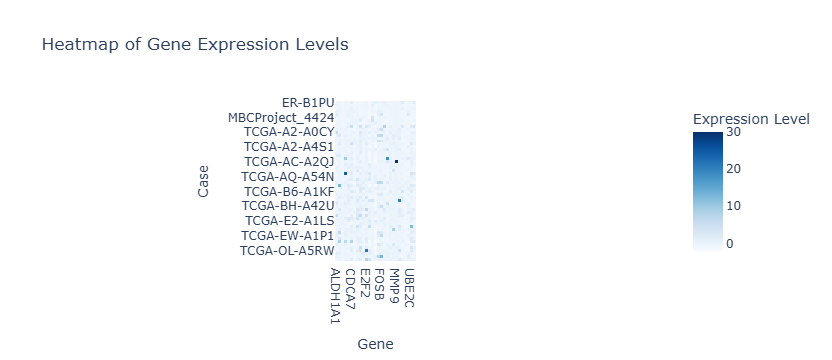

In [194]:
# Add Cancer Stage as hover information
custom_hover_data = df_drop_Clean.set_index(['Case', 'Gene'])['Cancer Stage']

# Create the heatmap
fig = px.imshow(
    heatmap_data.values,
    labels=dict(x="Gene", y="Case", color="Expression Level"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    color_continuous_scale="Blues",
    range_color=(-2, 30),
    title="Heatmap of Gene Expression Levels"
)

# Customize hover with Cancer Stage
fig.update_traces(
    hovertemplate=(
        "Gene: %{x}<br>"
        "Case: %{y}<br>"
        "Expression: %{z:.2f}<br>"
        "Cancer Stage: %{customdata}"
    ),
    customdata=custom_hover_data.reset_index().pivot(index='Case', columns='Gene')['Cancer Stage'].values
)

fig.show()


In [195]:
# df_drop_Clean['Cancer Stage'].fillna('Unknown', inplace=True)  # Replace NaNs with 'Unknown'


In [196]:
# filter by a list of genes and cases
# case_list = [
#     'TCGA-AC-A2QJ', 'TCGA-FA-A7DS', 'TCGA-A2-A4S1', 'TCGA-AR-A5QQ',
#     'TCGA-E9-A5FL', 'TCGA-E2-A1LL', 'TCGA-E2-A572', 'TCGA-A7-A56D',
#     'TCGA-E2-A1LS', 'TCGA-AC-A2QH'
# ]

# gene_list = [
#     'TP53INP1', 'CDH1', 'ALDH1A1', 'CD44', 'CCND1', 'CCND2', 'TOP2A',
#     'DUSP4', 'ERBB2', 'ERBB3', 'CDK6', 'LAMP5'
# ]

# # Filter the dataframe based on 'Case' and 'Gene' columns
# filtered_df = df_drop_Clean[df_drop_Clean['Case'].isin(case_list) & df_drop_Clean['Gene'].isin(gene_list)]

In [197]:
# Group data and calculate mean expression
aggregated_data = df_drop_Clean.groupby(
    ['Case', 'Cancer Stage', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'ajcc_pathologic_t', 'ajcc_pathologic_stage'], as_index=False
).agg({'Expression': 'mean'})

In [198]:
#note this does not have expression information
aggregated_data.head()

,Case,Cancer Stage,ajcc_pathologic_n,ajcc_pathologic_m,ajcc_pathologic_t,ajcc_pathologic_stage,Expression
0,TCGA-A1-A0SK,Stage II,N0 (i-),M0,T2,Stage IIA,0.870588
1,TCGA-A2-A0CO,Stage II,N0,M0,T3,Stage IIB,-0.049582
2,TCGA-A2-A0CY,Stage II,N1,M0,T2,Stage IIB,0.241313
3,TCGA-A2-A3XV,Stage II,N0,M0,T2,Stage IIA,-0.034559
4,TCGA-A2-A3XW,Stage II,N1a,M0,T2,Stage IIB,0.111374


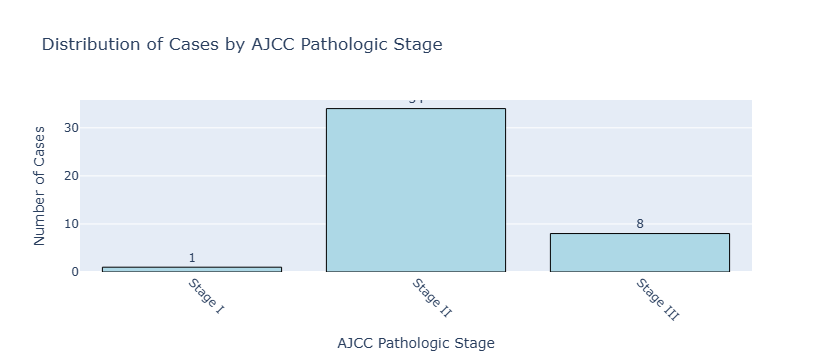

In [199]:
# Filter out "Unknown" values for the 'ajcc_pathologic_stage' column in the aggregated_data
filtered_data = aggregated_data[aggregated_data['ajcc_pathologic_stage'] != "Unknown"]

# Ensure 'Cancer Stage' is ordered correctly
sorted_stages = ['Stage I', 'Stage II', 'Stage III']
filtered_data['Cancer Stage'] = pd.Categorical(filtered_data['Cancer Stage'], categories=sorted_stages, ordered=True)

# Count cases by stage
stage_counts = filtered_data['Cancer Stage'].value_counts().sort_index()

# Create a DataFrame for Plotly
plot_data = stage_counts.reset_index()
plot_data.columns = ['Cancer Stage', 'Number of Cases']

# Create a bar plot using Plotly
fig = px.bar(
    plot_data,
    x='Cancer Stage',
    y='Number of Cases',
    text='Number of Cases',
    title='Distribution of Cases by AJCC Pathologic Stage',
    labels={'Cancer Stage': 'AJCC Pathologic Stage', 'Number of Cases': 'Number of Cases'},
)

# Customize plot appearance
fig.update_traces(textposition='outside', marker_color='lightblue', marker_line_color='black', marker_line_width=1)
fig.update_layout(xaxis_title='AJCC Pathologic Stage', yaxis_title='Number of Cases', xaxis_tickangle=45)

# Display the plot
fig.show()


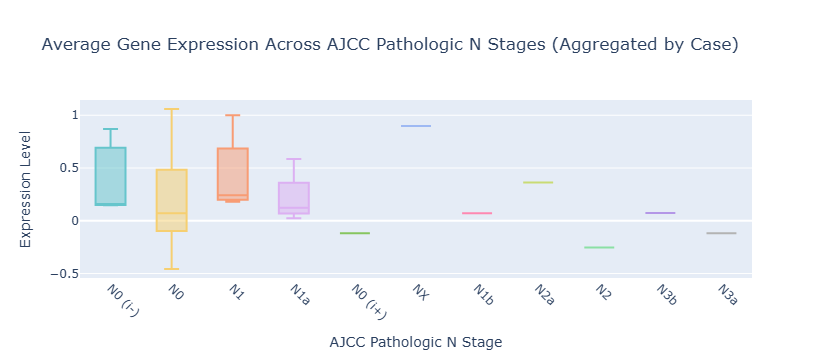

In [200]:
# Filter out "Unknown" and NaN values for AJCC Pathologic N stages
filtered_data_state_n = aggregated_data[
    (aggregated_data['ajcc_pathologic_n'] != "Unknown") & (aggregated_data['ajcc_pathologic_n']!= "nan")
]

# Create a box plot using Plotly
fig = px.box(
    filtered_data_state_n,
    x='ajcc_pathologic_n',
    y='Expression',
    color='ajcc_pathologic_n',  # Optional: Assign a unique color to each category
    title="Average Gene Expression Across AJCC Pathologic N Stages (Aggregated by Case)",
    labels={
        'ajcc_pathologic_n': 'AJCC Pathologic N Stage',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel 
)

# Update layout
fig.update_layout(
    xaxis_title="AJCC Pathologic N Stage",
    yaxis_title="Expression Level",
    xaxis_tickangle=45,
    showlegend=False  
)

# Display the plot
fig.show()


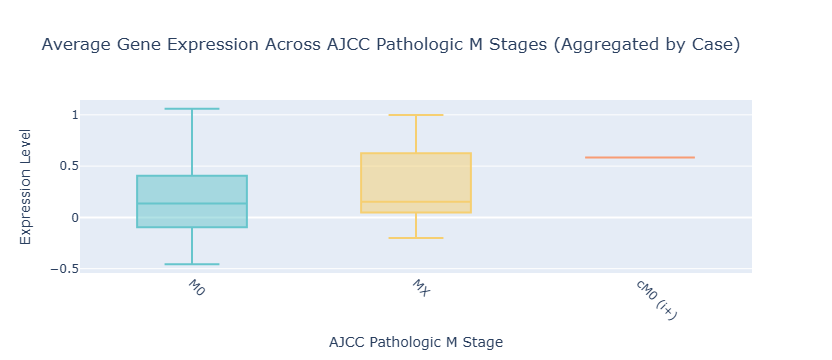

In [201]:
# Filter out "Unknown" values for AJCC Pathologic M stages
filtered_data_state_m = aggregated_data[
    (aggregated_data['ajcc_pathologic_m'] != "Unknown") & (aggregated_data['ajcc_pathologic_m']!= "nan")
]

fig = px.box(
    filtered_data_state_m,
    x='ajcc_pathologic_m',
    y='Expression',
    color='ajcc_pathologic_m', 
    title="Average Gene Expression Across AJCC Pathologic M Stages (Aggregated by Case)",
    labels={
        'ajcc_pathologic_m': 'AJCC Pathologic M Stage',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel 
)


fig.update_layout(
    xaxis_title="AJCC Pathologic M Stage",
    yaxis_title="Expression Level",
    xaxis_tickangle=45,
    showlegend=False  # Hide legend if not needed
)

# Show the interactive plot
fig.show()

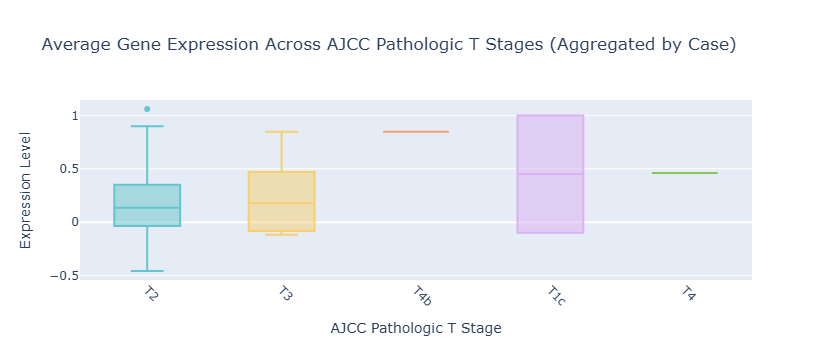

In [202]:
# Filter out "Unknown" values for AJCC Pathologic T stages
filtered_data_state_t = aggregated_data[
    (aggregated_data['ajcc_pathologic_t'] != "Unknown") & (aggregated_data['ajcc_pathologic_t']!= "nan")
]


fig = px.box(
    filtered_data_state_t,
    x='ajcc_pathologic_t',
    y='Expression',
    color='ajcc_pathologic_t',  
    title="Average Gene Expression Across AJCC Pathologic T Stages (Aggregated by Case)",
    labels={
        'ajcc_pathologic_t': 'AJCC Pathologic T Stage',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel 
)


fig.update_layout(
    xaxis_title="AJCC Pathologic T Stage",
    yaxis_title="Expression Level",
    xaxis_tickangle=45,
    showlegend=False 
)

fig.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_24300\1128557388.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



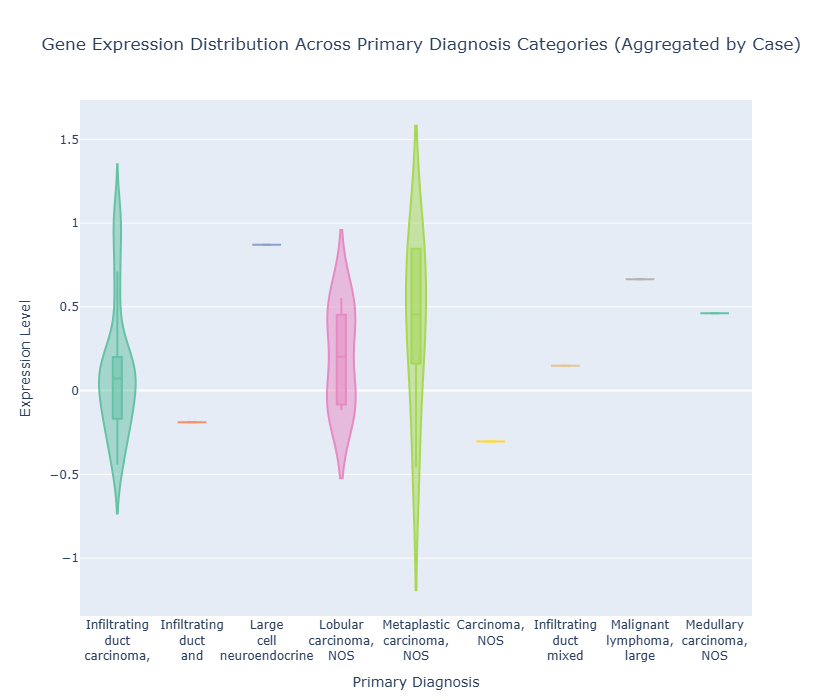

In [203]:
# Aggregate data by case (mean expression for cases with multiple rows)
aggregated_data = df_drop_Clean.groupby(['Case', 'primary_diagnosis'], as_index=False).agg({'Expression': 'mean'})

# Remove "Not Reported" values from the primary diagnosis column
filtered_data = aggregated_data[aggregated_data['primary_diagnosis'] != "Not Reported"]

# Shorten or format long labels with line breaks
filtered_data['primary_diagnosis'] = filtered_data['primary_diagnosis'].apply(
    lambda x: '<br>'.join(x.split(' ', 3)[:3]) if len(x.split(' ')) > 3 else x.replace(' ', '<br>')
)

# Create a violin plot using Plotly
fig = px.violin(
    filtered_data,
    x='primary_diagnosis',
    y='Expression',
    box=True,  
    points=False,
    color='primary_diagnosis',  
    title="Gene Expression Distribution Across Primary Diagnosis Categories (Aggregated by Case)",
    labels={
        'primary_diagnosis': 'Primary Diagnosis',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Set2 
)


fig.update_layout(
    xaxis_title="Primary Diagnosis",
    yaxis_title="Expression Level",
    xaxis_tickangle=0,  
    showlegend=False,  
    width=1200, 
    height=700  
)


fig.show()

